In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Para preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

# Ignorar warnings (opcional)
import warnings
warnings.filterwarnings("ignore")

# 1. CARGA DE DATOS

df = pd.read_csv("/workspaces/ejercicio_regresion_logistica/data/raw/bank-marketing-campaign-data.csv", sep=";")

# Si prefieres cargarlo desde el link original en GitHub (y no local):
# df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")

df.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [62]:
# Dimensiones del dataset
print("Shape (filas, columnas):", df.shape)

# Información de tipos de datos y nulos
df.info()

# Descripción estadística de numéricas
df.describe()


Shape (filas, columnas): (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Detección de duplicados

In [63]:
print("Número de filas duplicadas:", df.duplicated().sum())

# Si quisieras eliminar duplicados:
# df = df.drop_duplicates()
# print("Shape tras eliminar duplicados:", df.shape)


Número de filas duplicadas: 12


Revisión rápida de valores nulos

In [64]:
print("Valores nulos totales por columna:")
print(df.isnull().sum())


Valores nulos totales por columna:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Factorizar variables categoricas

In [65]:
df["y_n"] = pd.factorize(df["y"])[0]

# Guardar la columna codificada
transformation_rules_target= {row["y"]: row["y_n"] for _, row in df[["y", "y_n"]].drop_duplicates().iterrows()}

import json

with open("transformation_rules_target.json", "w") as f:
  json.dump(transformation_rules_target, f)


with open("transformation_rules_target.json", "r") as f:
  transformation_rules_target = json.load(f)

df["y_n"] = df["y"].apply(lambda x: transformation_rules_target[x])

# INVESTIGAR: ONE HOT ENCODING

In [66]:
import pandas as pd
import json

def one_hot_encode_and_save(df, output_file='transformacion.json'):
    """
    Realiza One-Hot Encoding en un DataFrame, identifica automáticamente las columnas categóricas,
    y guarda el resultado en un archivo JSON.

    Parámetros:
    df (pd.DataFrame): DataFrame a transformar.
    output_file (str): Nombre del archivo de salida JSON (por defecto 'transformacion.json').
    """
    # Paso 2: Identificar columnas categóricas
    # Las columnas categóricas suelen ser de tipo 'object' en pandas
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Paso 3: Aplicar One-Hot Encoding
    df_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, prefix_sep='_')
    
    # Paso 4: Guardar el resultado en un archivo JSON
    # Convertimos el DataFrame a un diccionario y luego a JSON
    df_encoded_dict = df_encoded.to_dict(orient='records')
    with open(output_file, 'w') as json_file:
        json.dump(df_encoded_dict, json_file, indent=4)
    
    print(f"Dataset transformado guardado en {output_file}")

# Ejemplo de uso de la función
df = pd.read_csv("/workspaces/ejercicio_regresion_logistica/data/raw/bank-marketing-campaign-data.csv", sep=";")  # Asumiendo que ya tienes un DataFrame cargado
one_hot_encode_and_save(df)

Dataset transformado guardado en transformacion.json


a) Histplot para algunas variables numéricas

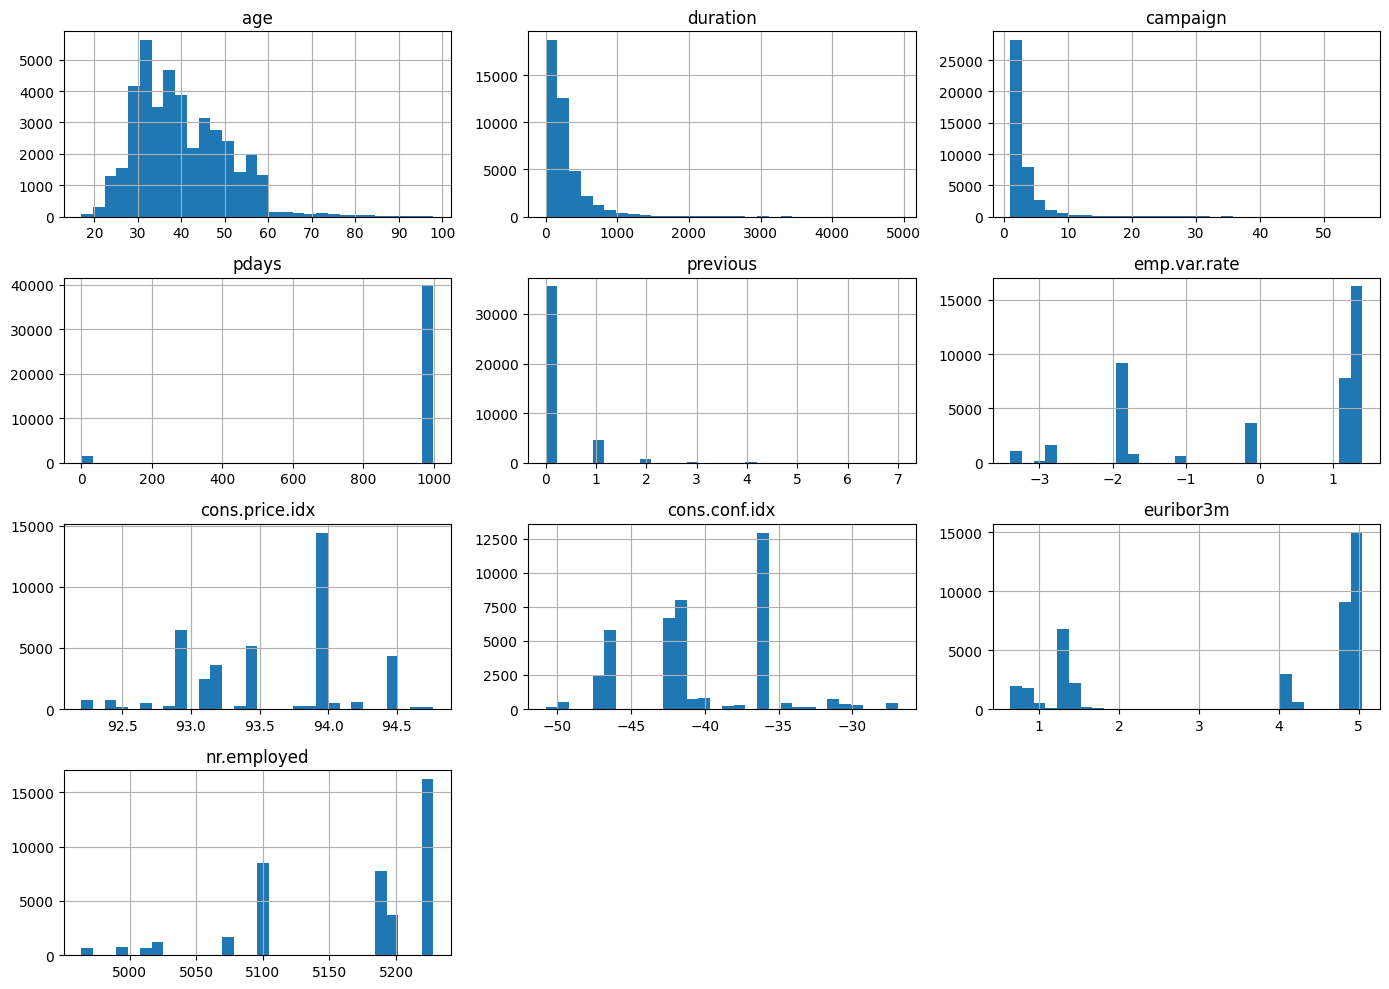

In [67]:
numeric_cols = ["age", "duration", "campaign", "pdays", "previous", 
                "emp.var.rate", "cons.price.idx", "cons.conf.idx", 
                "euribor3m", "nr.employed"]

df[numeric_cols].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()


b) Countplot para algunas variables categóricas

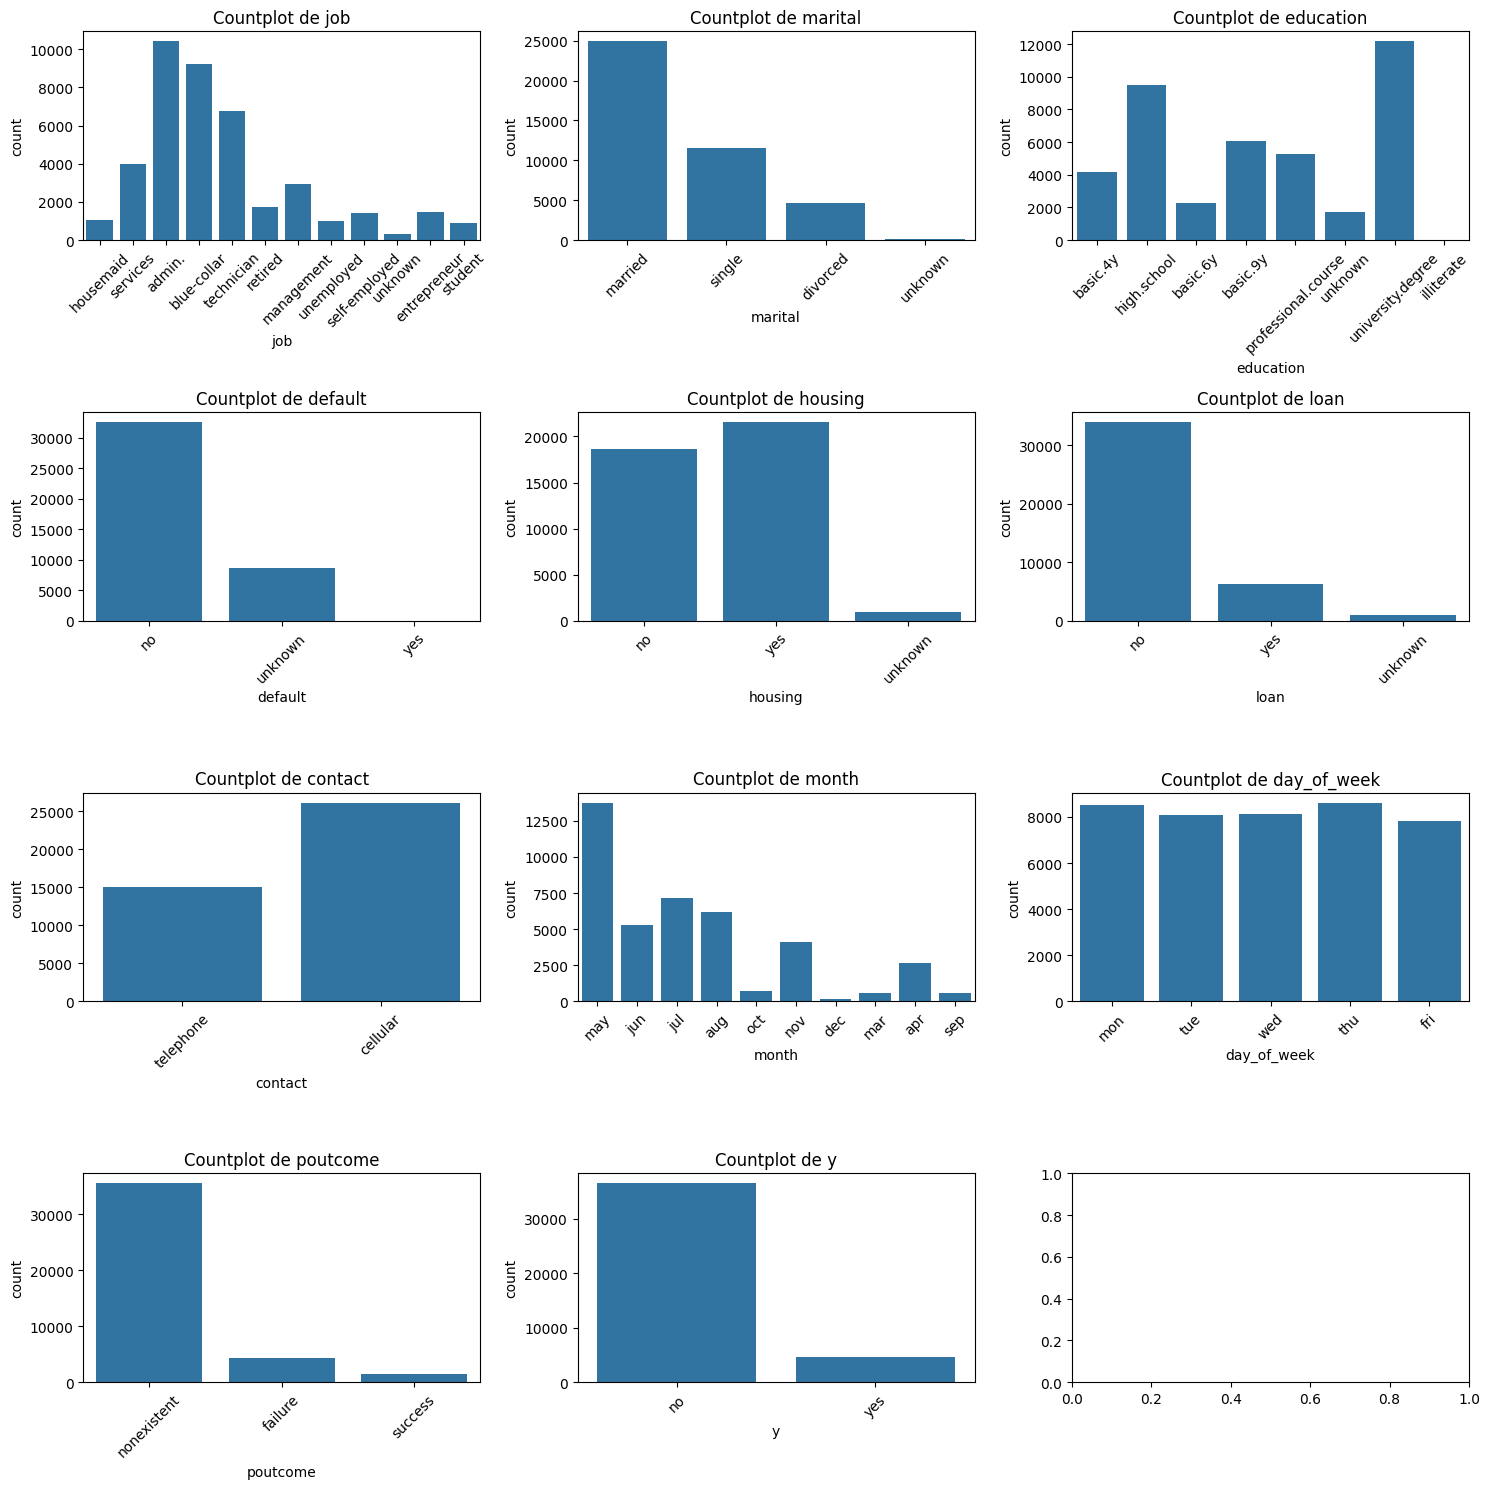

In [68]:
categorical_cols = ["job", "marital", "education", "default", 
                    "housing", "loan", "contact", "month", 
                    "day_of_week", "poutcome", "y"]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f"Countplot de {col}")
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Correlación (Heatmap) de las variables numéricas

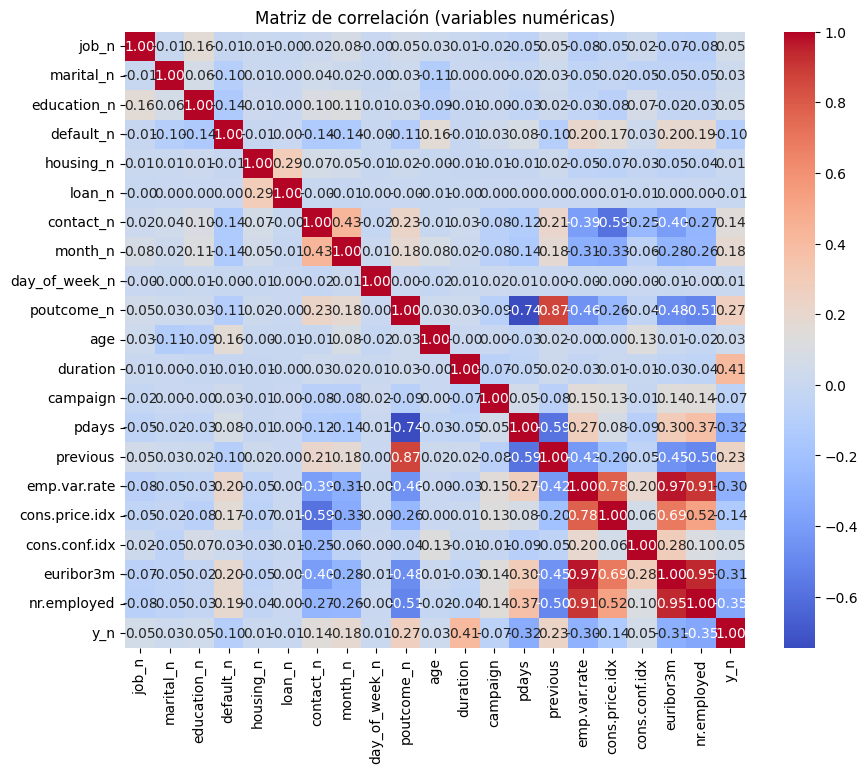

In [69]:
df["job_n"] = pd.factorize(df["job"])[0]
df["marital_n"] = pd.factorize(df["marital"])[0]
df["education_n"] = pd.factorize(df["education"])[0]
df["default_n"] = pd.factorize(df["default"])[0]
df["housing_n"] = pd.factorize(df["housing"])[0]
df["loan_n"] = pd.factorize(df["loan"])[0]
df["contact_n"] = pd.factorize(df["contact"])[0]
df["month_n"] = pd.factorize(df["month"])[0]
df["day_of_week_n"] = pd.factorize(df["day_of_week"])[0]
df["poutcome_n"] = pd.factorize(df["poutcome"])[0]
df["y_n"] = pd.factorize(df["y"])[0]
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

plt.figure(figsize=(10, 8))
corr_matrix = df[num_variables].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación (variables numéricas)")
plt.show()


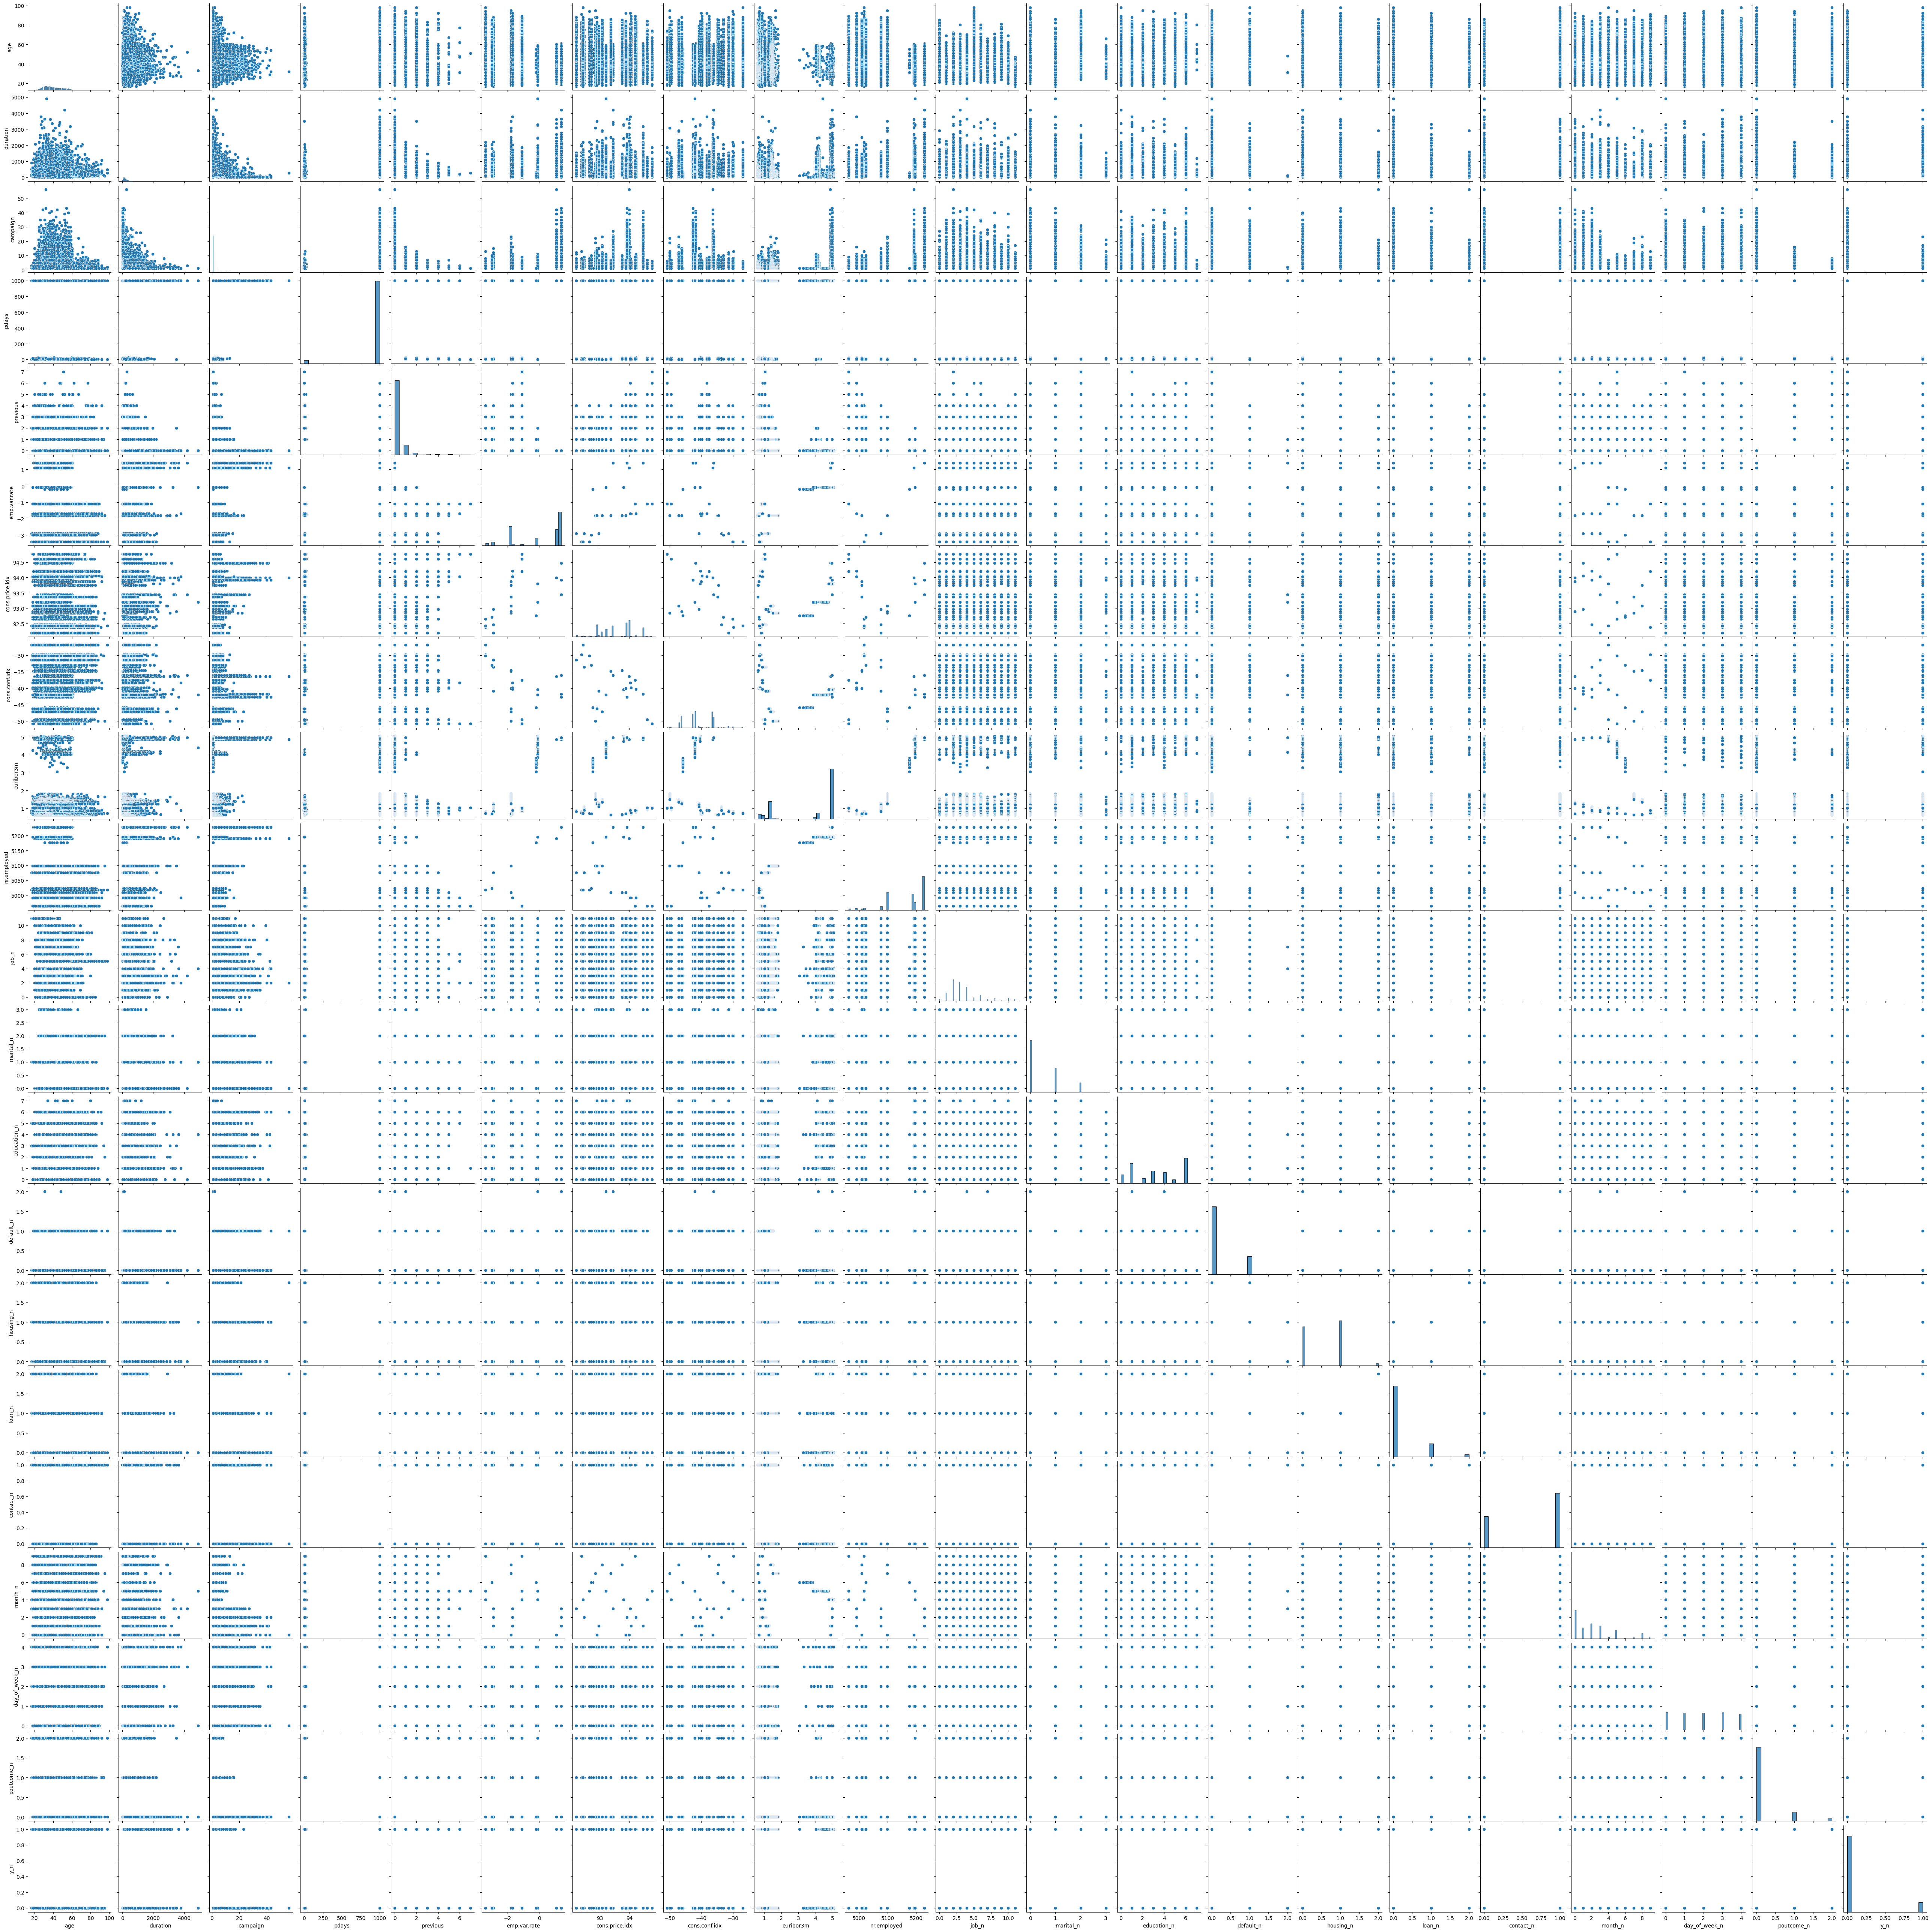

In [70]:
sns.pairplot(data = df)

In [71]:
with open("transformation_rules_target.json", "r") as f:
    transformation_rules_target = json.load(f)

# Asegurarse de que 'y_n' esté presente en el DataFrame
if "y_n" not in df.columns:
    df["y_n"] = df["y"].apply(lambda x: transformation_rules_target[x])

print(df[["y", "y_n"]].head())



    y  y_n
0  no    0
1  no    0
2  no    0
3  no    0
4  no    0


Selección de variables (features)

In [72]:
features = ["age", "duration", "campaign", "pdays", "previous", 
            "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

# Manejo de Outliers
def replace_outliers_from_column(column, df):
    """
    Recorta los valores de la columna según el IQR.
    """
    stats = df[column].describe()
    iqr = stats["75%"] - stats["25%"]
    lower_limit = stats["25%"] - 1.5 * iqr
    upper_limit = stats["75%"] + 1.5 * iqr
    if lower_limit < 0: lower_limit = min(df[column])
    # Aplicamos la función lambda para recortar
    df[column] = df[column].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
    return df, [lower_limit, upper_limit]

# Creamos dos copias del dataset:
#  - df_con_outliers: conserva los valores originales
#  - df_sin_outliers: se recortan los outliers en las columnas definidas en "features"
df_con_outliers = df.copy()
df_sin_outliers = df.copy()

outliers_dict = {}
for col in features:
    df_sin_outliers, limits = replace_outliers_from_column(col, df_sin_outliers)
    outliers_dict[col] = limits

print("Límites de outliers aplicados:")
for col, limits in outliers_dict.items():
    print(f"{col}: {limits}")

Límites de outliers aplicados:
age: [np.float64(9.5), np.float64(69.5)]
duration: [0, np.float64(644.5)]
campaign: [1, np.float64(6.0)]
pdays: [np.float64(999.0), np.float64(999.0)]
previous: [np.float64(0.0), np.float64(0.0)]
emp.var.rate: [-3.4, np.float64(6.200000000000001)]
cons.price.idx: [np.float64(91.69650000000001), np.float64(95.3725)]
cons.conf.idx: [-50.8, np.float64(-26.949999999999992)]
euribor3m: [0.634, np.float64(10.3865)]
nr.employed: [np.float64(4905.6), np.float64(5421.6)]


División en Train/Test

In [73]:
# Extraemos las features de cada versión y el target (y_n)
X_con_outliers = df_con_outliers[features].copy()
X_sin_outliers = df_sin_outliers[features].copy()
y = df_con_outliers["y_n"].copy()  # Usamos la versión original para target, ya que y_n es la misma

# Dividimos en train/test usando la versión con outliers para obtener los índices
from sklearn.model_selection import train_test_split
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(
    X_con_outliers, y, test_size=0.2, random_state=42, stratify=y)

# Usamos los mismos índices para la versión sin outliers
X_train_sin_outliers = X_sin_outliers.loc[X_train_con_outliers.index]
X_test_sin_outliers  = X_sin_outliers.loc[X_test_con_outliers.index]

print("X_train_con_outliers:", X_train_con_outliers.shape)
print("X_train_sin_outliers:", X_train_sin_outliers.shape)
print("y_train:", y_train.shape)

# Guardar los datasets procesados
X_train_con_outliers.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_con_outliers.xlsx", index=False)
X_test_con_outliers.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_con_outliers.xlsx", index=False)
X_train_sin_outliers.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_sin_outliers.xlsx", index=False)
X_test_sin_outliers.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_sin_outliers.xlsx", index=False)
y_train.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/y_train.xlsx", index=False)
y_test.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/y_test.xlsx", index=False)


X_train_con_outliers: (32950, 10)
X_train_sin_outliers: (32950, 10)
y_train: (32950,)


Escalado / Normalización

In [76]:
# --- Con StandardScaler ---
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Para datos CON outliers:
scaler_con_std = StandardScaler()
scaler_con_std.fit(X_train_con_outliers)
X_train_con_std = pd.DataFrame(scaler_con_std.transform(X_train_con_outliers), columns=features, index=X_train_con_outliers.index)
X_test_con_std  = pd.DataFrame(scaler_con_std.transform(X_test_con_outliers),  columns=features, index=X_test_con_outliers.index)

# Para datos SIN outliers:
scaler_sin_std = StandardScaler()
scaler_sin_std.fit(X_train_sin_outliers)
X_train_sin_std = pd.DataFrame(scaler_sin_std.transform(X_train_sin_outliers), columns=features, index=X_train_sin_outliers.index)
X_test_sin_std  = pd.DataFrame(scaler_sin_std.transform(X_test_sin_outliers),  columns=features, index=X_test_sin_outliers.index)

print("Vista de X_train_con_normalizado:")
print(X_train_con_std.head())
print("Vista de X_train_sin_normalizado:")
print(X_train_sin_std.head())

# Guardar los datasets procesados (Normalizados)
X_train_con_std.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_con_outliers_normalizado.xlsx", index=False)
X_test_con_std.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_con_outliers_normalizado.xlsx", index=False)
X_train_sin_std.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_sin_outliers_normalizado.xlsx", index=False)
X_test_sin_std.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_sin_outliers_normalizado.xlsx", index=False)

# --- Con MinMaxScaler ---
from sklearn.preprocessing import MinMaxScaler

# Para datos CON outliers:
scaler_con_mm = MinMaxScaler()
scaler_con_mm.fit(X_train_con_outliers)
X_train_con_mm = pd.DataFrame(scaler_con_mm.transform(X_train_con_outliers), columns=features, index=X_train_con_outliers.index)
X_test_con_mm  = pd.DataFrame(scaler_con_mm.transform(X_test_con_outliers),  columns=features, index=X_test_con_outliers.index)

# Para datos SIN outliers:
scaler_sin_mm = MinMaxScaler()
scaler_sin_mm.fit(X_train_sin_outliers)
X_train_sin_mm = pd.DataFrame(scaler_sin_mm.transform(X_train_sin_outliers), columns=features, index=X_train_sin_outliers.index)
X_test_sin_mm  = pd.DataFrame(scaler_sin_mm.transform(X_test_sin_outliers),  columns=features, index=X_test_sin_outliers.index)

print("Vista de X_train_con_escalado:")
print(X_train_con_mm.head())
print("Vista de X_train_sin_escalado:")
print(X_train_sin_mm.head())

# Guardar los datasets procesados (Escalados)
X_train_con_mm.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_con_outliers_escalado.xlsx", index=False)
X_test_con_mm.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_con_outliers_escalado.xlsx", index=False)
X_train_sin_mm.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_sin_outliers_escalado.xlsx", index=False)
X_test_sin_mm.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_sin_outliers_escalado.xlsx", index=False)

Vista de X_train_con_normalizado:
            age  duration  campaign     pdays  previous  emp.var.rate  \
25611  0.863739 -0.120196  0.522981  0.196584 -0.350127     -0.114858   
26010 -0.289722 -0.216732 -0.203688  0.196584  1.653813     -0.114858   
40194  3.651268  3.436173 -0.567023  0.196584 -0.350127     -1.133161   
297   -0.385843 -0.533368 -0.203688  0.196584 -0.350127      0.648868   
36344  1.824956  0.424264 -0.203688  0.196584 -0.350127     -1.896888   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
25611       -0.648967      -0.322269   0.288964     0.398990  
26010       -0.648967      -0.322269   0.288964     0.398990  
40194        1.103451       0.045048  -1.583296    -2.420139  
297          0.721890       0.887717   0.713535     0.332723  
36344       -1.058152      -0.062987  -1.357472    -1.252175  
Vista de X_train_sin_normalizado:
            age  duration  campaign  pdays  previous  emp.var.rate  \
25611  0.894415 -0.045350  1.118118    0.0   

Vista de X_train_con_escalado:
            age  duration  campaign  pdays  previous  emp.var.rate  \
25611  0.395062  0.046157  0.054545    1.0  0.000000      0.687500   
26010  0.246914  0.041074  0.018182    1.0  0.142857      0.687500   
40194  0.753086  0.233428  0.000000    1.0  0.000000      0.354167   
297    0.234568  0.024400  0.018182    1.0  0.000000      0.937500   
36344  0.518519  0.074827  0.018182    1.0  0.000000      0.104167   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
25611        0.389322       0.368201   0.790297     0.877883  
26010        0.389322       0.368201   0.790297     0.877883  
40194        0.784879       0.439331   0.053503     0.105860  
297          0.698753       0.602510   0.957379     0.859735  
36344        0.296960       0.418410   0.142371     0.425709  
Vista de X_train_sin_escalado:
            age  duration  campaign  pdays  previous  emp.var.rate  \
25611  0.609524  0.352211       0.6    0.0       0.0      0.687500   

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Número de características a seleccionar
k = 5

# Creamos el selector usando f_classif
selector = SelectKBest(score_func=f_classif, k=k)

# Aplicamos el selector a los datos escalados sin outliers
# (puedes elegir también la versión con outliers si lo prefieres)
selector.fit(X_train_sin_std, y_train)

# Obtenemos la máscara booleana de las características seleccionadas
mask = selector.get_support()

# Extraemos los nombres de las columnas seleccionadas a partir de nuestra lista 'features'
selected_features = np.array(features)[mask]
print("Características seleccionadas:", selected_features)

# Transformamos los datasets de train y test para quedarnos solo con las características seleccionadas
X_train_sel = pd.DataFrame(selector.transform(X_train_sin_std),
                           columns=selected_features,
                           index=X_train_sin_std.index)
X_test_sel = pd.DataFrame(selector.transform(X_test_sin_std),
                          columns=selected_features,
                          index=X_test_sin_std.index)

print("X_train_sel shape:", X_train_sel.shape)
print("X_test_sel shape:", X_test_sel.shape)

# (Opcional) Guardar los datasets seleccionados
X_train_sel.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_sel.xlsx", index=False)
X_test_sel.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_sel.xlsx", index=False)


Características seleccionadas: ['duration' 'emp.var.rate' 'cons.price.idx' 'euribor3m' 'nr.employed']
X_train_sel shape: (32950, 5)
X_test_sel shape: (8238, 5)
